In [12]:
import streamlit as st
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [13]:
st.title('The Police Incidents Reports from 2018 to 2020 in San Francisco')
df=pd.read_csv('Police_Department_Incident_Reports.csv')

st.markdown('The data shown below belongs to incident reports in the city of San Francisco, from the year 2018 to 2020, with details from each case such as date, day of the week, police district, neighborhood in which it happened, type of incident in category and subcategory, exact location and resolution.')


DeltaGenerator()

In [14]:
mapa=pd.DataFrame()
mapa['Date']=df['Incident Date']
mapa['Day']=df['Incident Day of Week']
mapa['Police District']=df['Police District']
mapa['Neighborhood']= df['Analysis Neighborhood']
mapa['Incident Category']=df['Incident Category']
mapa['Incident Subcategory']=df['Incident Subcategory']
mapa['Resolution']=df['Resolution']
mapa['lat']=df['Latitude']
mapa['lon']=df['Longitude']
mapa=mapa.dropna()

In [15]:
subset_data2 = mapa
police_district_input = st.sidebar.multiselect(
'Police District',
mapa.groupby('Police District').count().reset_index()['Police District'].tolist())
if len(police_district_input) > 0:
    subset_data2 = mapa[mapa['Police District'].isin(police_district_input)]

subset_data1 = subset_data2
neighborhood_input = st.sidebar.multiselect(
'Neighborhood',
subset_data2.groupby('Neighborhood').count().reset_index()['Neighborhood'].tolist())
if len(neighborhood_input) > 0:
    subset_data1 = subset_data2[subset_data2['Neighborhood'].isin(neighborhood_input)]

subset_data = subset_data1
incident_input = st.sidebar.multiselect(
'Incident Category',
subset_data1.groupby('Incident Category').count().reset_index()['Incident Category'].tolist())
if len(incident_input) > 0:
    subset_data = subset_data1[subset_data1['Incident Category'].isin(incident_input)]
            
subset_data

,Date,Day,Police District,Neighborhood,Incident Category,Incident Subcategory,Resolution,lat,lon
3,2020/08/16,Sunday,Bayview,Potrero Hill,Assault,Aggravated Assault,Open or Active,37.754827,-122.397729
4,2020/08/16,Sunday,Mission,Mission,Malicious Mischief,Vandalism,Open or Active,37.766540,-122.422044
5,2020/08/16,Sunday,Southern,Financial District/South Beach,Non-Criminal,Other,Open or Active,37.784044,-122.403712
6,2020/08/16,Sunday,Taraval,Sunset/Parkside,Weapons Offense,Weapons Offense,Cite or Arrest Adult,37.751003,-122.507416
7,2020/08/12,Wednesday,Northern,Western Addition,Missing Person,Missing Adult,Open or Active,37.780496,-122.432140
...,...,...,...,...,...,...,...,...,...
379508,2020/08/15,Saturday,Central,Nob Hill,Larceny Theft,Larceny Theft - From Building,Open or Active,37.788808,-122.411886
379509,2020/08/15,Saturday,Northern,Pacific Heights,Non-Criminal,Other,Open or Active,37.792263,-122.436204
379510,2020/08/15,Saturday,Central,Financial District/South Beach,Burglary,Burglary - Other,Open or Active,37.788293,-122.408402
379511,2020/08/15,Saturday,Taraval,West of Twin Peaks,Recovered Vehicle,Recovered Vehicle,Open or Active,37.741234,-122.474494


DeltaGenerator()

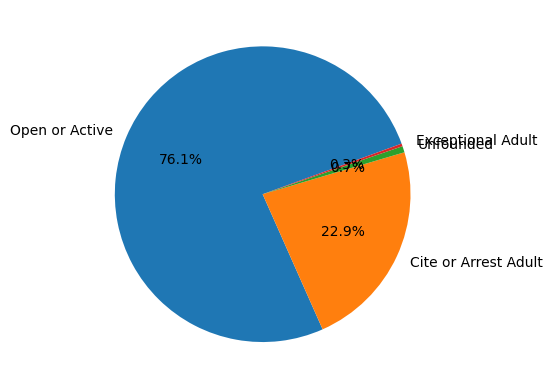

In [16]:
st.markdown('It is important to mention that any police district can answer to any incident, the neighborhood in which it happened is not related to the police district.')
st.markdown('Crime locations in San Francisco')
st.map(subset_data)
st.markdown('Crimes ocurred per day of the week')
st.bar_chart(subset_data['Day'].value_counts())
st.markdown('Crimes ocurred per date')
st.line_chart(subset_data['Date'].value_counts())
st.markdown('Type of crisis commited')
st.bar_chart(subset_data['Incident Category'].value_counts())

agree = st.button('Click to see Incident Subcategories')
if agree:
  st.markdown('Subtype of crimes committed')
  st.bar_chart(subset_data['Incident Category'].value_counts())
  
st.markdown('Resolution status')
fig1, ax1=plt.subplots()
labels=subset_data['Resolution'].unique()
ax1.pie(subset_data['Resolution'].value_counts(),labels=labels,autopct='%1.1f%%',startangle=20)
st.pyplot(fig1)